# Feature Subeset selction

Feature selection is a way of selecting the subset of the most relevant features from the original features set by removing the redundant, irrelevant, or noisy features.

Feature subset selection or simply called feature selection, both for supervised as well as unsupervised learning, try to find out the optimal subset of the entire feature set which significantly reduces computational cost without any major impact on the learning accuracy. It may seem that a feature subset may lead to loss of
 
useful information as certain features are going to be excluded from the final set of features used for learning. However, for elimination only features which are not relevant or redundant are selected.
A feature is considered as irrelevant if it plays an insignificant role (or contributes almost no information) in classifying or grouping together a set of data instances. All irrelevant features are eliminated while selecting the final feature subset. A feature is potentially redundant when the information contributed by the feature is more or less same as one or more other features. Among a group of potentially redundant features, a small number of features can be selected as a part of the final feature subset without causing any negative impact to learn model accuracy.
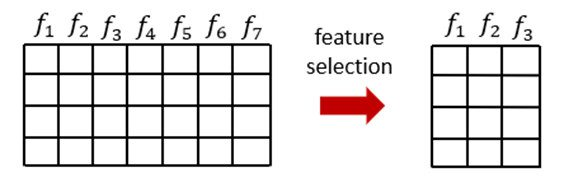

**Benefits of using feature selection in machine learning**

- It helps in avoiding the curse of dimensionality.

- It helps in the simplification of the model so that it can be easily interpreted by the researchers.

- It reduces the training time.

- It reduces overfitting hence enhance the generalization.

### Feature Selection VS Feature Extraction:
The main difference between feature selction and Extraction is that feature selection is about selecting the subset of the original feature set, whereas feature extraction creates new features.

# Feature Selction Techniques:

**Supervised :** Supervised Feature selection techniques consider the target variable and can be used for the labelled dataset.

**Unsupervised :** Unsupervised Feature selection techniques ignore the target variable and can be used for the unlabelled dataset.
### Supervised Feature Slection
- **Filter Methods**
1. Variance thresholding.
2. Correlation.
3. Chi-square test
4. ANOVA test
5. Information Gain

- **Wrapper Method**
1. Forward Feature Selection.
2. Backward Feature Selection.
3. Exhaustive Feature Selection



- **Embedded Method**
1. Regularization(L1,L2).
2. Random Forest.

# Filter Methods


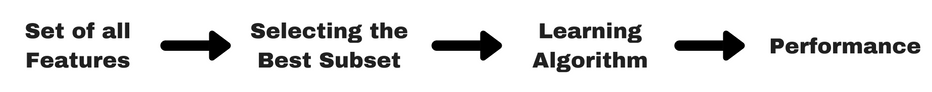

Filter feature selection methods apply a statistical measure to assign a scoring to each feature. The features are ranked by the score and either selected to be kept or removed from the dataset. The methods are often univariate and consider the feature independently, or with regard to the dependent variable.

This method does not depend on the learning algorithm and chooses the features as a pre-processing step.

The filter method filters out the irrelevant feature and redundant columns from the model by using different metrics through ranking.

The advantage of using filter methods is that it needs low computational time and does not overfit the data.

#### Variance Thresholding
The variance threshold is a simple baseline approach to feature selection. It removes all features which variance doesn’t meet some threshold. By default, it removes all zero-variance features, i.e., features that have the same value in all samples. We assume that features with a higher variance may contain more useful information, but note that we are not taking the relationship between feature variables or feature and target variables into account, which is one of the drawbacks of filter methods.

In [1]:
import pandas as pd 
import warnings
warnings.filterwarnings('ignore')

df = pd.DataFrame({"F1":[1,2,4,1,2,4], 
                    "F2":[4,5,6,7,8,9], 
                    "F3":[0,0,0,0,0,0],
                    "F4":[1,1,1,1,1,1]}) 
df

,F1,F2,F3,F4
0,1,4,0,1
1,2,5,0,1
2,4,6,0,1
3,1,7,0,1
4,2,8,0,1
5,4,9,0,1


In [2]:
from sklearn.feature_selection import VarianceThreshold
var_thres=VarianceThreshold(threshold=0)
var_thres.fit(df)


VarianceThreshold(threshold=0)

In [3]:
var_thres.get_support()


array([ True,  True, False, False])

In [4]:
df.columns[var_thres.get_support()]

Index(['F1', 'F2'], dtype='object')

# Feature Selection using Correlation


In [5]:
#importing libraries
from sklearn.datasets import load_boston
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
#Loading the dataset
df = load_boston()
x = pd.DataFrame(df.data, columns = df.feature_names)
y = df.target

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    x,
    y,
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape

((354, 13), (152, 13))

In [8]:
X_train.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
CRIM,1.000000,-0.196172,0.382073,-0.049364,0.416560,-0.188280,0.329927,-0.355840,0.603880,0.560570,0.264780,-0.299525,0.439369
ZN,-0.196172,1.000000,-0.529392,-0.063863,-0.523572,0.319260,-0.583885,0.658331,-0.314833,-0.327834,-0.392838,0.164641,-0.429178
INDUS,0.382073,-0.529392,1.000000,0.044224,0.750218,-0.392969,0.629257,-0.686848,0.578459,0.719038,0.388353,-0.331638,0.603374
CHAS,-0.049364,-0.063863,0.044224,1.000000,0.043748,0.088125,0.067269,-0.085492,0.022338,-0.017156,-0.072683,0.069682,-0.059060
NOX,0.416560,-0.523572,0.750218,0.043748,1.000000,-0.279202,0.740052,-0.765753,0.627188,0.683445,0.179046,-0.369445,0.577154
RM,-0.188280,0.319260,-0.392969,0.088125,-0.279202,1.000000,-0.235839,0.183857,-0.179242,-0.275242,-0.385526,0.157459,-0.623920
AGE,0.329927,-0.583885,0.629257,0.067269,0.740052,-0.235839,1.000000,-0.761543,0.440578,0.502429,0.239729,-0.250416,0.606530
DIS,-0.355840,0.658331,-0.686848,-0.085492,-0.765753,0.183857,-0.761543,1.000000,-0.467653,-0.519643,-0.176620,0.248376,-0.501780
RAD,0.603880,-0.314833,0.578459,0.022338,0.627188,-0.179242,0.440578,-0.467653,1.000000,0.907455,0.437687,-0.415325,0.442783
TAX,0.560570,-0.327834,0.719038,-0.017156,0.683445,-0.275242,0.502429,-0.519643,0.907455,1.000000,0.447518,-0.412145,0.515905


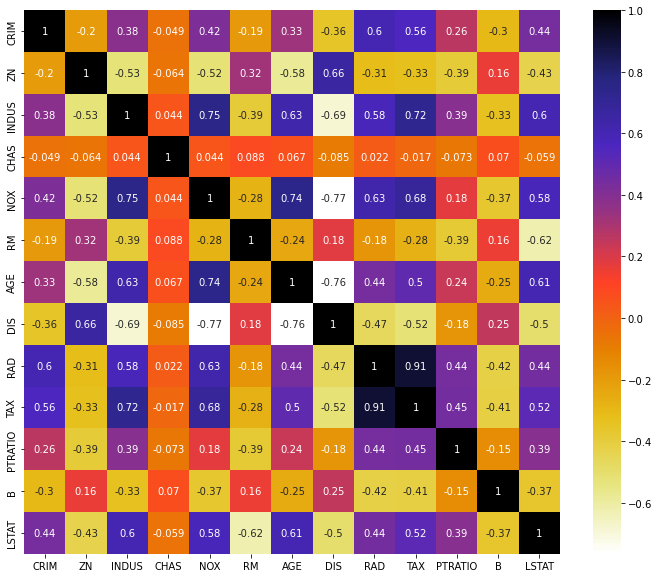

In [9]:
import seaborn as sns
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = X_train.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [10]:
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [11]:
corr_features = correlation(X_train, 0.7)
len(set(corr_features))

4

In [12]:
corr_features

{'AGE', 'DIS', 'NOX', 'TAX'}

In [13]:
X_train.drop(corr_features,axis=1)
X_test.drop(corr_features,axis=1)

,CRIM,ZN,INDUS,CHAS,RM,RAD,PTRATIO,B,LSTAT
329,0.06724,0.0,3.24,0.0,6.333,4.0,16.9,375.21,7.34
371,9.23230,0.0,18.10,0.0,6.216,24.0,20.2,366.15,9.53
219,0.11425,0.0,13.89,1.0,6.373,5.0,16.4,393.74,10.50
403,24.80170,0.0,18.10,0.0,5.349,24.0,20.2,396.90,19.77
78,0.05646,0.0,12.83,0.0,6.232,5.0,18.7,386.40,12.34
...,...,...,...,...,...,...,...,...,...
4,0.06905,0.0,2.18,0.0,7.147,3.0,18.7,396.90,5.33
428,7.36711,0.0,18.10,0.0,6.193,24.0,20.2,96.73,21.52
385,16.81180,0.0,18.10,0.0,5.277,24.0,20.2,396.90,30.81
308,0.49298,0.0,9.90,0.0,6.635,4.0,18.4,396.90,4.54


***Information Gain(IG)***: Information gain determines the reduction in entropy while transforming the dataset. It can be used as a feature selection technique by calculating the information gain of each variable with respect to the target variable.

***Chi-square Test:*** Chi-square test is a technique to determine the relationship between the categorical variables. The chi-square value is calculated between each feature and the target variable, and the desired number of features with the best chi-square value is selected.

***Fisher's Score:***
Fisher's score is one of the popular supervised technique of features selection. It returns the rank of the variable on the fisher's criteria in descending order. Then we can select the variables with a large fisher's score.

In [14]:
import seaborn as sns
import numpy as np
df=sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [16]:
##['sex','embarked','alone','pclass','Survived']
df=df[['sex','embarked','alone','pclass','survived']]
df.head()

,sex,embarked,alone,pclass,survived
0,male,S,False,3,0
1,female,C,False,1,1
2,female,S,True,3,1
3,female,S,False,1,1
4,male,S,True,3,0


In [17]:
from sklearn.preprocessing import LabelEncoder

In [18]:
le = LabelEncoder()

In [19]:
df['embarked']=le.fit_transform(df['embarked'])
df['alone'] = le.fit_transform(df['alone'])
df['sex'] = le.fit_transform(df['sex'])

In [20]:
df

,sex,embarked,alone,pclass,survived
0,1,2,0,3,0
1,0,0,0,1,1
2,0,2,1,3,1
3,0,2,0,1,1
4,1,2,1,3,0
...,...,...,...,...,...
886,1,2,1,2,0
887,0,2,1,1,1
888,0,2,0,3,0
889,1,0,1,1,1


In [21]:
x = df.iloc[:,:-1]
y= df.iloc[:,-1]

In [22]:
## Perform chi2 test
### chi2 returns 2 values
### Fscore and the pvalue
from sklearn.feature_selection import chi2
f_p_values=chi2(x,y)

In [23]:
f_p_values

(array([92.70244698,  9.75545583, 14.64079273, 30.87369944]),
 array([6.07783826e-22, 1.78791305e-03, 1.30068490e-04, 2.75378563e-08]))

In [24]:
import pandas as pd
p_values=pd.Series(f_p_values[0])
p_values.index=x.columns
p_values


sex         92.702447
embarked     9.755456
alone       14.640793
pclass      30.873699
dtype: float64

In [25]:
p_values.sort_index(ascending=False)

sex         92.702447
pclass      30.873699
embarked     9.755456
alone       14.640793
dtype: float64

# Wrapper Method 
In wrapper methodology, selection of features is done by considering it as a search problem, in which different combinations are made, evaluated, and compared with other combinations. It trains the algorithm by using the subset of features iteratively.

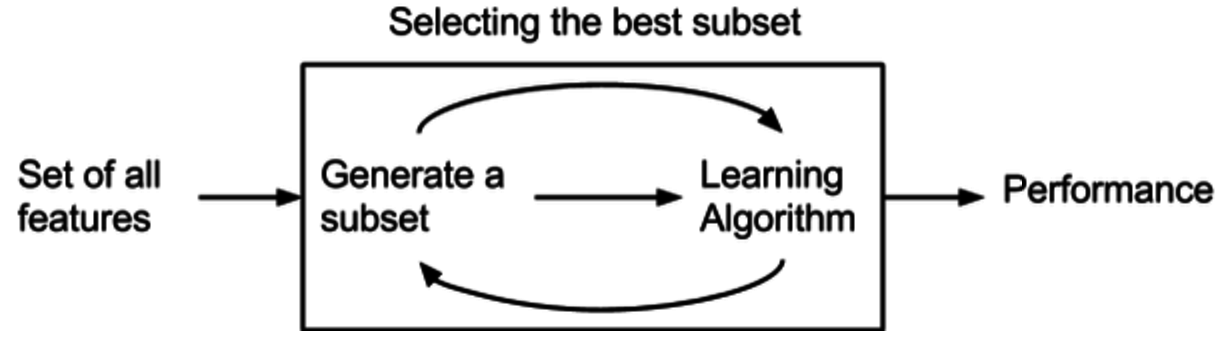

On the basis of the output of the model, features are added or subtracted, and with this feature set, the model has trained again.

- ***Forward selection -*** Forward selection is an iterative process, which begins with an empty set of features. After each iteration, it keeps adding on a feature and evaluates the performance to check whether it is improving the performance or not. The process continues until the addition of a new variable/feature does not improve the performance of the model.


- ***Backward elimination -*** Backward elimination is also an iterative approach, but it is the opposite of forward selection. This technique begins the process by considering all the features and removes the least significant feature. This elimination process continues until removing the features does not improve the performance of the model.


- ***Exhaustive Feature Selection-*** Exhaustive feature selection is one of the best feature selection methods, which evaluates each feature set as brute-force. It means this method tries & make each possible combination of features and return the best performing feature set.



- ***Recursive Feature Elimination-*** Recursive feature elimination is a recursive greedy optimization approach, where features are selected by recursively taking a smaller and smaller subset of features. Now, an estimator is trained with each set of features, and the importance of each feature is determined using coef_attribute or through a feature_importances_attribute.

# Embedded Methods
Embedded methods combined the advantages of both filter and wrapper methods by considering the interaction of features along with low computational cost. These are fast processing methods similar to the filter method but more accurate than the filter method.

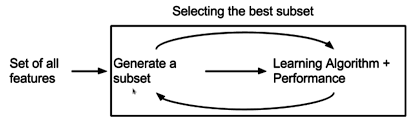

- **Regularization-** Regularization adds a penalty term to different parameters of the machine learning model for avoiding overfitting in the model. This penalty term is added to the coefficients; hence it shrinks some coefficients to zero. Those features with zero coefficients can be removed from the dataset. The types of regularization techniques are L1 Regularization (Lasso Regularization) or Elastic Nets (L1 and L2 regularization).




- **Random Forest Importance -** Different tree-based methods of feature selection help us with feature importance to provide a way of selecting features. Here, feature importance specifies which feature has more importance in model building or has a great impact on the target variable. Random Forest is such a tree-based method, which is a type of bagging algorithm that aggregates a different number of decision trees. It automatically ranks the nodes by their performance or decrease in the impurity (Gini impurity) over all the trees. Nodes are arranged as per the impurity values, and thus it allows to pruning of trees below a specific node. The remaining nodes create a subset of the most important features.

# Choosing feature section techniques :

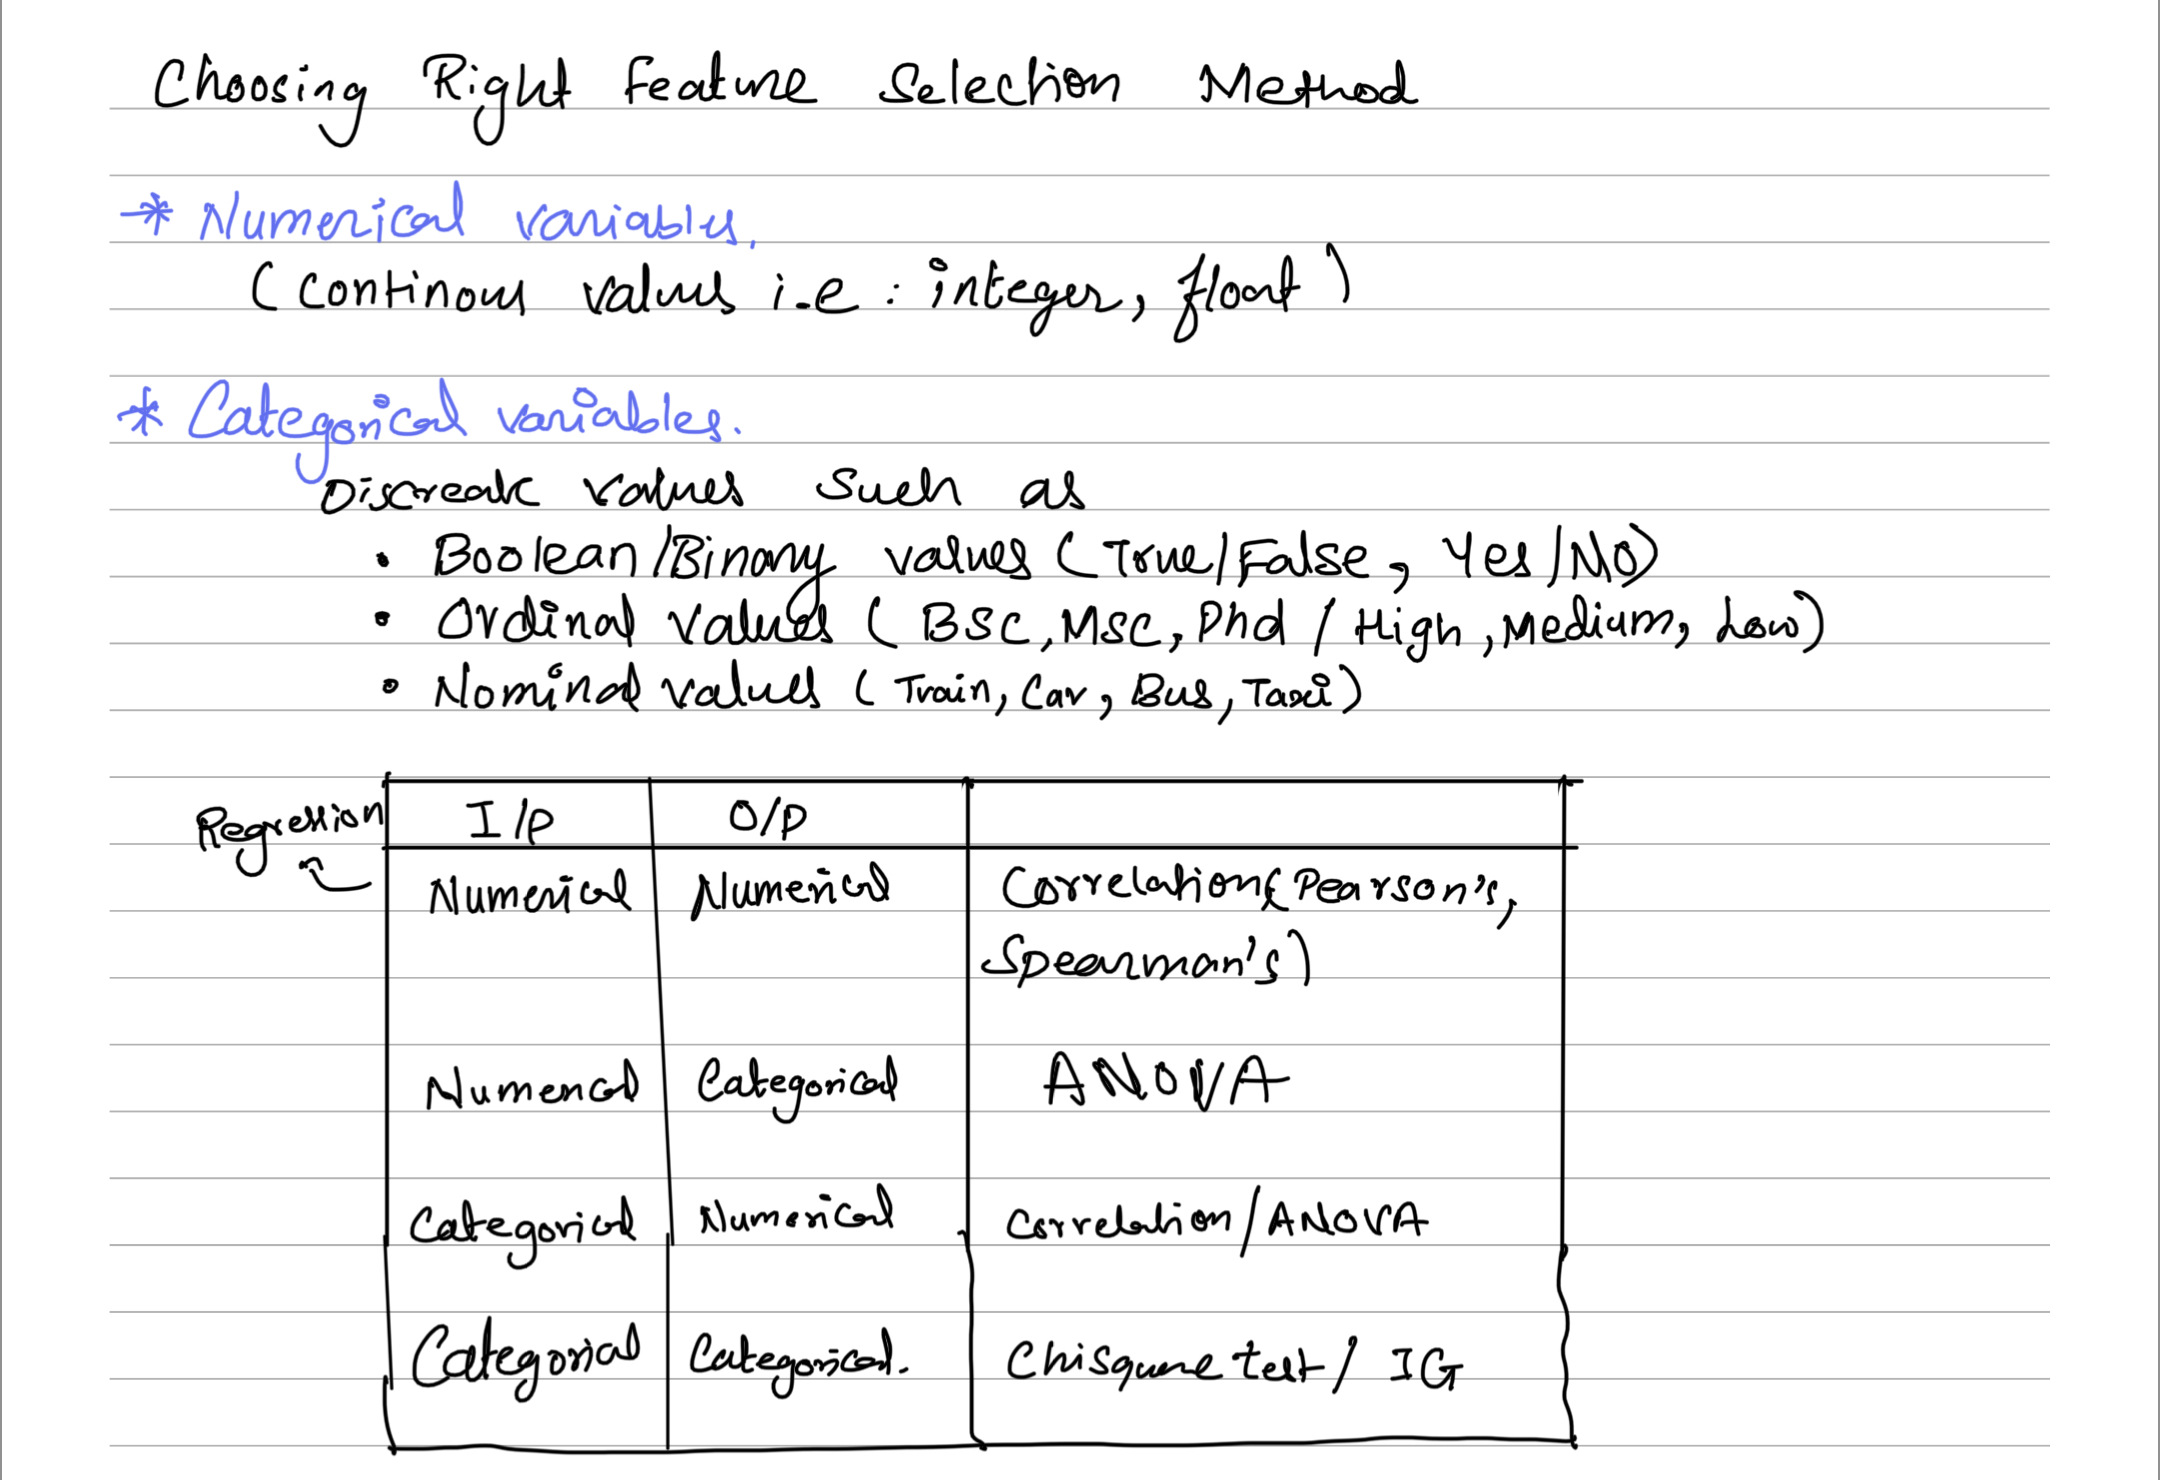

# Assignment Questions :
Variance Reduction : https://www.kaggle.com/competitions/santander-customer-satisfaction/data
Correlation Analysis : https://www.kaggle.com/competitions/santander-customer-satisfaction/data
Chi-Square : creat the given data and implement chi square feature selection.
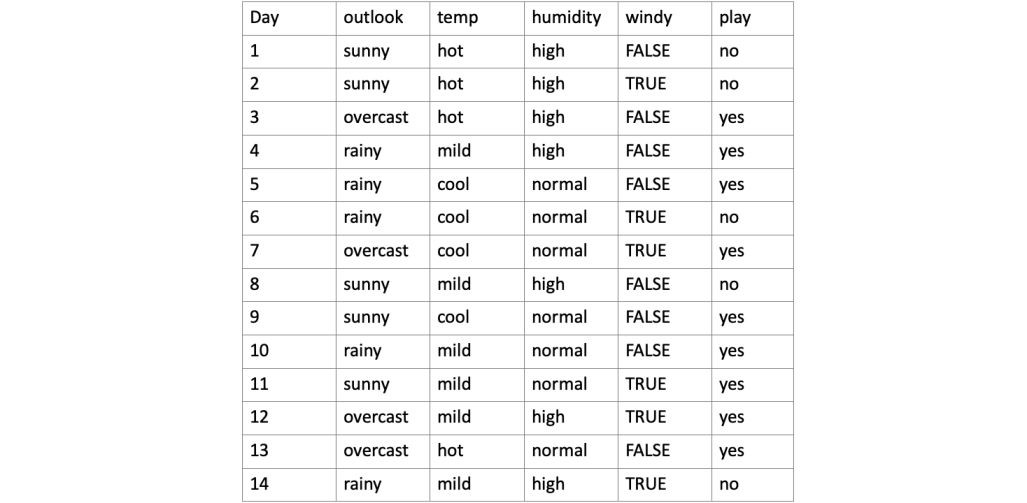
